In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler,MinMaxScaler 

# loading data

In [146]:
df = pd.read_csv('https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [150]:
df.head(5)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [151]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

# 1. Data Exploration

In [152]:
# listing down unique values in each feature and their length
for column in df.columns:
    unique_val = df[column].unique()
    print(f"feature: {column}")
    print(f"Unique values ({len(unique_vals)}): {unique_val}")

# statistical analysis
print("statistical Summary : ")
print(df.describe(include = 'all'))
# renaming the column
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')
print("Renamed columns:", df.columns)

feature: Company
Unique values (2): ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
feature: Age
Unique values (2): [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
feature: Salary
Unique values (2): [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
feature: Place
Unique values (2): ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
feature: Country
Unique values (2): ['India']
feature: Gender
Unique values (2): [0 1]
statistical Summary : 
       Company         Age       Salary   Place Country      Gender
count      140  130.000000   124.000000     134     148  148.000000
unique       6         NaN          NaN    

# 2. Data cleaning

In [154]:
# checking for missing values
print("Missing values before cleaning:", df.isnull().sum())
# replacing with 0 in age column (age)
df['age'] = df['age'].replace(0,np.nan)
# checking after replacement
print ("Missing values after replacing 0 with NaN:",df.isnull().sum())

Missing values before cleaning: company     8
age        18
salary     24
place      14
country     0
gender      0
dtype: int64
Missing values after replacing 0 with NaN: company     8
age        24
salary     24
place      14
country     0
gender      0
dtype: int64


In [155]:
# Removing duplicate values(rows)
df = df.drop_duplicates()

In [161]:
# Treat missing values
# Numerical columns: fill with mean or median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    median_val = df[col].median()
    data[col] = df[col].fillna(median_val)

# Categorical columns: fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    mode_val = df[col].mode()[0]
    data[col] = df[col].fillna(mode_val)

# Find outliers using IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(data[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"\nOutliers in {col}: {outliers.shape[0]}")


Outliers in age: 0

Outliers in salary: 0

Outliers in gender: 32


# 3. Data Analysis

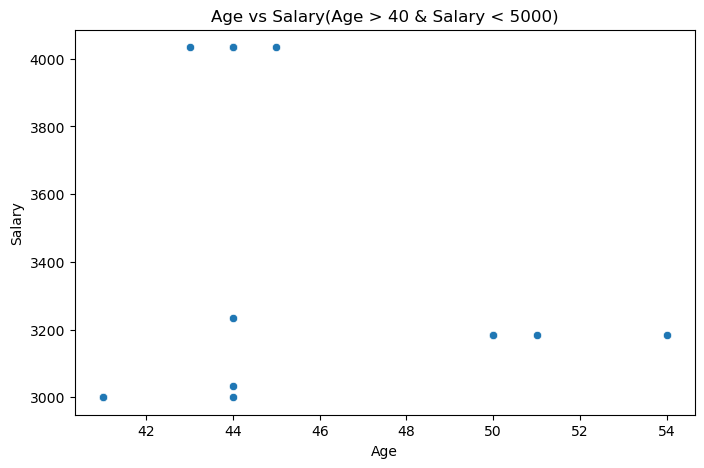

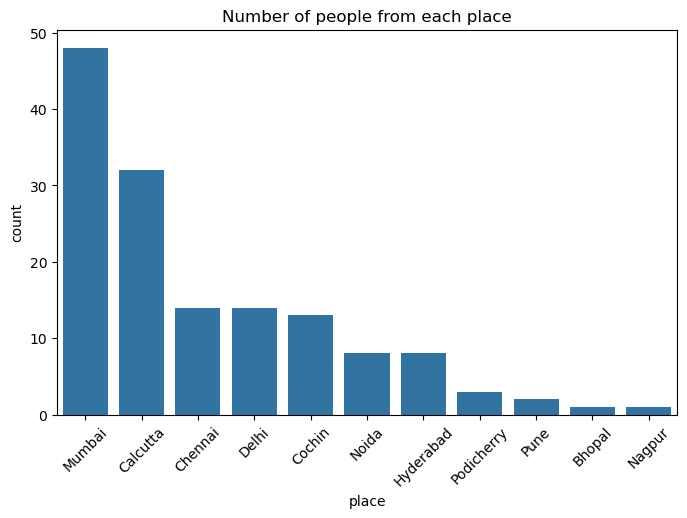

In [167]:
# filter:Age> 40 and salary<5000
filtered_data = df[(df['age']> 40) & (df['salary'] < 5000)]

# Age Vs Salary(plot)
plt.figure(figsize = (8,5))
sns.scatterplot(x=filtered_data['age'], y=filtered_data['salary'])
plt.title('Age vs Salary(Age > 40 & Salary < 5000)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

place_counts = df['place'].value_counts()

# bar plot for count and place
plt.figure(figsize = (8,5))
sns.barplot(x=place_counts.index, y = place_counts.values)
plt.xticks(rotation=45)
plt.title('Number of people from each place')
plt.xlabel('place')
plt.ylabel('count')
plt.show()           

# 4. Data Encoding

In [168]:
#label encoding for simple categorical columns
label_enc = LabelEncoder()
for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col])
print("Data after Encoding:")
print(df.head())

Data after Encoding:
   company   age  salary  place  country  gender
0        4  20.0  5000.0      2        0       0
1        2  30.0  5000.0      6        0       0
2        4  35.0  2300.0      1        0       0
3        2  40.0  3000.0      4        0       0
4        4  23.0  4000.0      6        0       0


# 5. Feature Scaling

In [169]:
standard_scaler =  StandardScaler()
data_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df), columns= df.columns)

minmax_scaler =  MinMaxScaler()
data_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df), columns = df.columns)

print("Standard Scaled data Sample:", data_standard_scaled.head())
print("Minmax Scaled Data Sample:", data_minmax_scaled.head())                                       

Standard Scaled data Sample:     company       age    salary     place  country    gender
0  0.991489 -1.484676 -0.100827 -0.893255      0.0 -0.534522
1 -0.239325 -0.267174 -0.100827  0.750562      0.0 -0.534522
2  0.991489  0.341577 -1.243735 -1.304209      0.0 -0.534522
3 -0.239325  0.950328 -0.947426 -0.071346      0.0 -0.534522
4  0.991489 -1.119426 -0.524127  0.750562      0.0 -0.534522
Minmax Scaled Data Sample:    company       age    salary  place  country  gender
0      0.8  0.081081  0.445089    0.2      0.0     0.0
1      0.4  0.351351  0.445089    0.6      0.0     0.0
2      0.8  0.486486  0.137817    0.1      0.0     0.0
3      0.4  0.621622  0.217480    0.4      0.0     0.0
4      0.8  0.162162  0.331285    0.6      0.0     0.0
